In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 150)

### Data Sourcing

In [2]:
# Read the application_data 
application_data = pd.read_csv('application_data.csv')

print("Application_data Shape :",application_data.shape)

Application_data Shape : (307511, 122)


In [3]:
# Print application_data 
application_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Data Cleaning

**Remove columns and rows with high null values**

In [5]:
# Print the column-wise null percentage 
high_na_col = round(100*application_data.isnull().sum()/len(application_data.index),2)

# Remove the columns with high null percentage greater than 40%
high_na_col = high_na_col[high_na_col > 40].index

print(len(high_na_col))

application_data.drop(list(high_na_col), axis=1, inplace= True)

print("Application_data Shape: ",application_data.shape)

49
Application_data Shape:  (307511, 73)


In [6]:
# Print col-wise null percentage 
round(100*application_data.isnull().sum()/len(application_data.index),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

In [7]:
# Print the row-wise null percentage
high_na_rows = round(100*application_data.isnull().sum(axis=1)/application_data.shape[0],2) 

high_na_rows = list(high_na_rows[high_na_rows > 30].index)

print(len(high_na_rows))

0


None of the rows has high null percentage

**Dropping unneccessary columns**

In [8]:
# Dropping the columns which are not required for analysis 
col_list = [  'EXT_SOURCE_3','FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',  'FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
             'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE', 
             'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
             'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR', 'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

application_data.drop(col_list, axis=1, inplace=True)

In [9]:
# Print col-wise null percentage 
round(100*application_data.isnull().sum()/len(application_data.index),4)

SK_ID_CURR                      0.0000
TARGET                          0.0000
NAME_CONTRACT_TYPE              0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
CNT_CHILDREN                    0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0039
AMT_GOODS_PRICE                 0.0904
NAME_TYPE_SUITE                 0.4201
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH                 0.0000
OCCUPATION_TYPE                31.3455
CNT_FAM_MEMBERS                 0.0007
REGION_RATING_CLIENT            0.0000
REGION_RATING_CLIENT_W_CITY     0.0000
ORGANIZATION_TYPE        

In [10]:
print("Application_data Shape :", application_data.shape)

# All the unnecessary columns are removed

Application_data Shape : (307511, 27)


**Checking for DataTypes**

In [11]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [12]:
#Analysis should be perform on Target data which is int, but it should be 'categorical' 
application_data['TARGET'] = pd.Categorical(application_data['TARGET'], ordered=True)

# Convert the object datatypes into categorical data
application_data.loc[:, application_data.dtypes=='object'] = application_data.select_dtypes(['object']).apply(lambda x: x.astype('category'))

application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  category
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

**Impute/Remove Missing values**

Still there are some columns which has missing values. These missing values should be handled to get the consistent data

In [13]:
# Impute values for 'AMT_ANNUITY' 'AMT_GOODS_PRICE', 'EXT_SOURCE_2'
print(application_data[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2','CNT_FAM_MEMBERS']].describe([.25,.5,.75,.95,.99]))

# As there is a huge difference between 99% and max value,It will be better to impute the na values with median 
application_data['AMT_ANNUITY'] = application_data.AMT_ANNUITY.replace(np.NaN, application_data['AMT_ANNUITY'].median())

# As there is a huge difference between 99% and max value,It will be better to impute the na values with median 
application_data['AMT_GOODS_PRICE'] = application_data.AMT_GOODS_PRICE.replace(np.NaN, application_data['AMT_GOODS_PRICE'].median())

# As there are no outliers, It is better to impute these values with Mean 
application_data['EXT_SOURCE_2'] = application_data.EXT_SOURCE_2.replace(np.NaN, application_data['EXT_SOURCE_2'].mean())


# As there are no outliers, It is better to impute these values with Mean 
application_data['CNT_FAM_MEMBERS'] = application_data.CNT_FAM_MEMBERS.replace(np.NaN, application_data['CNT_FAM_MEMBERS'].median())
 

         AMT_ANNUITY  AMT_GOODS_PRICE  EXT_SOURCE_2  CNT_FAM_MEMBERS
count  307499.000000     3.072330e+05  3.068510e+05    307509.000000
mean    27108.573909     5.383962e+05  5.143927e-01         2.152665
std     14493.737315     3.694465e+05  1.910602e-01         0.910682
min      1615.500000     4.050000e+04  8.173617e-08         1.000000
25%     16524.000000     2.385000e+05  3.924574e-01         2.000000
50%     24903.000000     4.500000e+05  5.659614e-01         2.000000
75%     34596.000000     6.795000e+05  6.636171e-01         3.000000
95%     53325.000000     1.305000e+06  7.477341e-01         4.000000
99%     70006.500000     1.800000e+06  7.827928e-01         5.000000
max    258025.500000     4.050000e+06  8.549997e-01        20.000000


In [14]:
# Impute values for 'NAME_TYPE_SUITE'
print(application_data['NAME_TYPE_SUITE'].value_counts()) 

#Impute values for 'OCCUPATION_TYPE'
print(application_data['OCCUPATION_TYPE'].value_counts())

#NA values in NAME_TYPE_SUITE is less, hence imputed with most frequently occuring type 'Unaccompanied'
application_data['NAME_TYPE_SUITE'] = application_data.NAME_TYPE_SUITE.fillna('Unaccompanied')

#NA values in OCCUPATION TYPE is high, hence we will treat them as a seperate category, 'Missing'
application_data['OCCUPATION_TYPE'] = application_data.OCCUPATION_TYPE.cat.add_categories('Missing').fillna('Missing')


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


In [15]:
print(application_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  category
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

**Standardising Values**

In [16]:
# Derving columns from days column as years 
application_data['AGE'] = abs(application_data['DAYS_BIRTH']/365).astype(int)

#binning the age by bins, hence it will be used for analysis 

application_data['AGE_BINS']          = pd.cut(x=application_data['AGE'], bins=[0,30,40,50,60,100], labels = ['0-30','30-40','40-50','50-60', '60+'])

application_data['YEARS_EMPLOYED']    = abs(application_data['DAYS_EMPLOYED']/365).astype(int)

application_data['YEARS_REGISTRATION'] = abs(application_data['DAYS_REGISTRATION']/365).astype(int)

application_data['YEARS_PUBLISH']     = abs(application_data['DAYS_ID_PUBLISH']/365).astype(int)

# Dropping the original columns
application_data.drop(['AGE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'],axis=1,inplace=True)

In [17]:
print(application_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  category
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

Here all the datatypes are checked, and null values are handled

**Handling Outliers**

In [18]:
#Check for Outliers in numerical data 
pd.options.display.float_format = "{:.2f}".format

num_cols = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
'CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','EXT_SOURCE_2','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_PUBLISH']

application_data[num_cols].describe([.25,.5,.75,.95,.99]).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
CNT_CHILDREN,307511.00,0.42,0.72,0.00,0.00,0.00,1.00,2.00,3.00,19.00
AMT_INCOME_TOTAL,307511.00,168797.92,237123.15,25650.00,112500.00,147150.00,202500.00,337500.00,472500.00,117000000.00
AMT_CREDIT,307511.00,599026.00,402490.78,45000.00,270000.00,513531.00,808650.00,1350000.00,1854000.00,4050000.00
AMT_ANNUITY,307511.00,27108.49,14493.46,1615.50,16524.00,24903.00,34596.00,53325.00,70006.50,258025.50
AMT_GOODS_PRICE,307511.00,538316.29,369288.98,40500.00,238500.00,450000.00,679500.00,1305000.00,1800000.00,4050000.00
REGION_POPULATION_RELATIVE,307511.00,0.02,0.01,0.00,0.01,0.02,0.03,0.05,0.07,0.07
CNT_FAM_MEMBERS,307511.00,2.15,0.91,1.00,2.00,2.00,3.00,4.00,5.00,20.00
REGION_RATING_CLIENT,307511.00,2.05,0.51,1.00,2.00,2.00,2.00,3.00,3.00,3.00
REGION_RATING_CLIENT_W_CITY,307511.00,2.03,0.50,1.00,2.00,2.00,2.00,3.00,3.00,3.00
EXT_SOURCE_2,307511.00,0.51,0.19,0.00,0.39,0.57,0.66,0.75,0.78,0.85


In [19]:
def udf_boxplot(*args, df):
    m = math.ceil(len(args)/2)
    
    fig, axes = plt.subplots(m,2,figsize=(10, 5*m) )
    ax_li     = [item for sublist in axes for item in sublist]
    
    for col in args:
        ax_list = ax_li.pop()
        sns.boxplot(y=df[col], ax= ax_list)
        ax_list.set_title(col)
        
        ax_list.set_yscale('log')

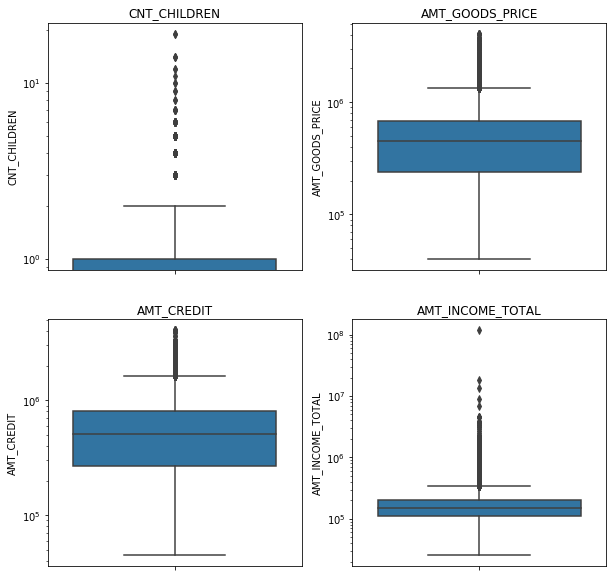

In [20]:
ouliers = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_GOODS_PRICE','CNT_CHILDREN']

udf_boxplot(*ouliers, df=application_data)

In [21]:
def udf_remove_outliers(col_name, df):
    quant    = df[col_name].quantile(0.95)
    print(col_name)
    print(quant)
    df       = df[df[col_name] <= quant]
    return df
    
for col in ouliers:
    application_data = udf_remove_outliers(col, application_data)
    

AMT_INCOME_TOTAL
337500.0
AMT_CREDIT
1312110.0
AMT_GOODS_PRICE
1026000.0
CNT_CHILDREN
2.0


In [22]:
application_data[ouliers].describe([.25,.5,.75,.95,.99]).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
AMT_INCOME_TOTAL,261459.00,149423.16,62076.93,25650.00,108000.00,135000.00,180000.00,270000.00,315000.00,337500.00
AMT_CREDIT,261459.00,491439.15,274223.22,45000.00,263686.50,450000.00,675000.00,1006920.00,1118459.88,1310409.00
AMT_GOODS_PRICE,261459.00,436427.88,240269.29,40500.00,225000.00,450000.00,675000.00,900000.00,945000.00,1026000.00
CNT_CHILDREN,261459.00,0.38,0.64,0.00,0.00,0.00,1.00,2.00,2.00,2.00


In [24]:
# YEARS_EMPLOYED has values equal to 1000, but in real, a person cannot live 1000 years. Hence it is considered as outlier
quant = application_data['YEARS_EMPLOYED'].quantile(0.75)
application_data = application_data[application_data['YEARS_EMPLOYED'] <= quant]

In [25]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196921 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   196921 non-null  int64   
 1   TARGET                       196921 non-null  category
 2   NAME_CONTRACT_TYPE           196921 non-null  category
 3   CODE_GENDER                  196921 non-null  category
 4   FLAG_OWN_CAR                 196921 non-null  category
 5   FLAG_OWN_REALTY              196921 non-null  category
 6   CNT_CHILDREN                 196921 non-null  int64   
 7   AMT_INCOME_TOTAL             196921 non-null  float64 
 8   AMT_CREDIT                   196921 non-null  float64 
 9   AMT_ANNUITY                  196921 non-null  float64 
 10  AMT_GOODS_PRICE              196921 non-null  float64 
 11  NAME_TYPE_SUITE              196921 non-null  category
 12  NAME_INCOME_TYPE             196921 non-null

In [26]:
196921/307511

0.6403705883691966